# Baseline Comparison

## Read Data

In [77]:
from os import getcwd
from os.path import dirname, join
from pandas import read_csv

In [294]:
#wd = read_csv(join(dirname(getcwd()), "Data", "LC80080582015052LGN00_NoBruma_Atmosphericparameters.csv"), sep='\t')
wd = read_csv(join(dirname(getcwd()), "Data", "LT40080581989356XXX02_NoBruma_Atmospheric_parameters.csv"), sep='\t')

In [295]:
#bd = read_csv(join(dirname(getcwd()), "Data", "LC80080582015052LGN00_Bruma_Atmosphericparameters.csv"), sep='\t')
bd = read_csv(join(dirname(getcwd()), "Data", "LT40080581989356XXX02_Bruma_Atmospheric_parameters.csv"), sep='\t')

## Columns names

In [296]:
print(wd.columns)

Index([u'atmoProfile', u'aeroProfile', u'GroundReflectance', u'AOT', u'band',
       u'aX', u'bX', u'cX', u'MeanSRRAD', u'MaxSRRAD', u'MinSRRAD',
       u'StdSRRAD', u'MedianSRRAD', u'MeanSRTOA', u'MaxSRTOA', u'MinSRTOA',
       u'StdSRTOA', u'MedianSRTOA', u'MeanSRRADG', u'MaxSRRADG', u'MinSRRADG',
       u'StdSRRADG', u'MedianSRRADG', u'MeanSRTOAG', u'MaxSRTOAG',
       u'MinSRTOAG', u'StdSRTOAG', u'MedianSRTOAG'],
      dtype='object')


## Distances

In [297]:
from numpy import array, sqrt

In [298]:
num_bands = 6

In [299]:
results = []
for i in range(0, len(bd), num_bands):
    vect_pow = []
    vect_abs = []
    for j in range(num_bands):
        wd_band = wd.iloc[i + j]
        bd_band = bd.iloc[i + j]
        ## Bands normalization
        norm_wd_band = (wd_band["MeanSRRAD"] - wd_band["MinSRRADG"]) / (wd_band["MaxSRRADG"] - wd_band["MinSRRADG"])
        norm_bd_band = (bd_band["MeanSRRAD"] - wd_band["MinSRRADG"]) / (wd_band["MaxSRRADG"] - wd_band["MinSRRADG"])
        ## Differences calculations
        vect_pow.append((norm_wd_band - norm_bd_band) ** 2)
        vect_abs.append(abs(norm_wd_band - norm_bd_band))
    eu = sqrt(sum(vect_pow))
    mh = sum(vect_abs)
    results.append((eu, mh))
results = array(results)

## Minimums

In [300]:
from numpy import amin, argmin

In [301]:
print(amin(results, axis=0))

[ 0.0296525   0.05144064]


In [302]:
print(argmin(results, axis=0))

[1767  846]


## Maximums

In [303]:
from numpy import amax, argmax

In [304]:
print(amax(results, axis=0))

[ 0.07564864  0.16035654]


In [305]:
print(argmax(results, axis=0))

[1191  267]


## Sort

In [335]:
from numpy import sort, where

In [336]:
sorted_res = sort(results, axis=0)

In [337]:
half_value = len(sorted_res) / 2

In [338]:
print(half_value)

924


In [339]:
print(sorted_res[half_value])

[ 0.05776908  0.1360597 ]


In [342]:
print(where(results == sorted_res[half_value][0]))

(array([1809, 1820, 1831, 1842]), array([0, 0, 0, 0]))


## Parameter Configuration

In [355]:
index_config = 1842

In [356]:
indexed_wd = wd.iloc[index_config * num_bands : index_config * num_bands + num_bands]

In [357]:
indexed_bd = bd.iloc[index_config * num_bands : index_config * num_bands + num_bands]

In [358]:
print(indexed_wd)

       atmoProfile  aeroProfile  GroundReflectance  AOT  band       aX  \
11052            0            7                 -4  0.5     1  0.00272   
11053            0            7                 -4  0.5     2  0.00265   
11054            0            7                 -4  0.5     3  0.00296   
11055            0            7                 -4  0.5     4  0.00420   
11056            0            7                 -4  0.5     5  0.01940   
11057            0            7                 -4  0.5     6  0.05160   

            bX       cX   MeanSRRAD  MaxSRRAD      ...       MeanSRRADG  \
11052  0.11714  0.19406    0.944173       1.0      ...        47.795600   
11053  0.06659  0.14887    8.620398      26.0      ...        72.626588   
11054  0.04261  0.12231    5.013142      17.0      ...        70.232331   
11055  0.02436  0.09706  235.979907     348.0      ...       202.028970   
11056  0.00759  0.05191  103.431302     152.0      ...       121.222287   
11057  0.00556  0.03633   33.38

## Plot Signature Comparison

In [359]:
%matplotlib inline

from matplotlib.pyplot import plot, show

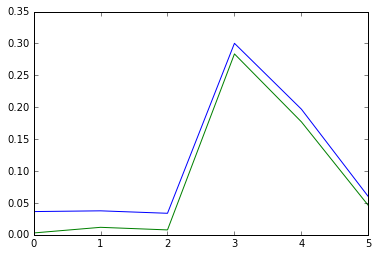

In [360]:
norm_wd_bands = []
norm_bd_bands = []
for i in range(index_config * num_bands, index_config * num_bands + num_bands):
    wd_band = wd.iloc[i]
    bd_band = bd.iloc[i]
    ## Bands normalization
    norm_wd_bands.append((wd_band["MeanSRRAD"] - wd_band["MinSRRADG"]) / (wd_band["MaxSRRADG"] - wd_band["MinSRRADG"]))
    norm_bd_bands.append((bd_band["MeanSRRAD"] - wd_band["MinSRRADG"]) / (wd_band["MaxSRRADG"] - wd_band["MinSRRADG"]))
plot(norm_wd_bands, "g", norm_bd_bands, "b")